# Code to reproduce the figures of the paper
### + generate files for later statistical analyses
### + supplementary figures which are not in the paper (search for suplementary)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats
import colorcet as cc
from statsmodels.stats.anova import AnovaRM
import diptest
import matplotlib as mpl
import random
import matplotlib.patches as mpatches
import sklearn

In [2]:
set_WD = os.getcwd() # get current work directory

# ACCESS PHASE: path to data_T1_access.csv 
df = pd.read_csv(set_WD+r"\data\processed_data\data_T1_access.csv") 

# ELABORATION PHASE: path to data_T1_visu_V2.csv 
df_visu = pd.read_csv(set_WD+r"\data\processed_data\data_T1_visu.csv")

# ORIENTATION of gaze aversion
# df_or = dataframe containing orientations detected with the eye-tracker + a column 'corrected_orientation_video' containing the check of the orientation based on the video
df_or = pd.read_csv(set_WD+r"\data\processed_data\orientation gaze aversion\orientation gaze aversion after correction with video.csv")

############################################################################################################
wd_output=set_WD+r"\\data\\figures\\" # path to a directory where the figures will be saved

files_for_stat = set_WD+r'\data\processed_data\files for statitical analyses\\'

sns.set(style="darkgrid")
df_acc = df.loc[df['delai']!=0] # dataframe containing only the trials where there is gaze aversion for the access phase
df_vis = df_visu[df_visu['delai']!=0] # dataframe containing only the trials where there is gaze aversion for the access phase
df_vis = df_vis.reset_index()

if not os.path.exists(wd_output):
    os.makedirs(wd_output) # create the path if it does not already exist
if not os.path.exists(wd_output + "supplementary\\"):
    os.makedirs(wd_output + "supplementary\\") # create the path if it does not already exist
    

In [3]:
sujets =['P01','P02','P03','P04','P05','P06', \
      'P07','P09','P10','P11','P12','P13', \
      'P14','P15','P16','P17','P18', \
      'P19', 'P20', 'P21', 'P22', 'P23', 'P24', \
       'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33'] # list of all the participants with their anonymized code

palette = sns.color_palette(cc.glasbey_bw, n_colors=32) # create a palette with 32 colors to link one color with one participant all along the analyses
palette = np.array(palette)

# Access Phase

## Characterization of gaze aversion

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


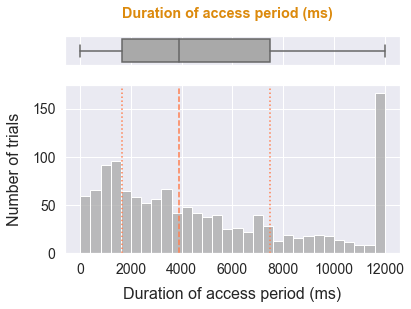

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_

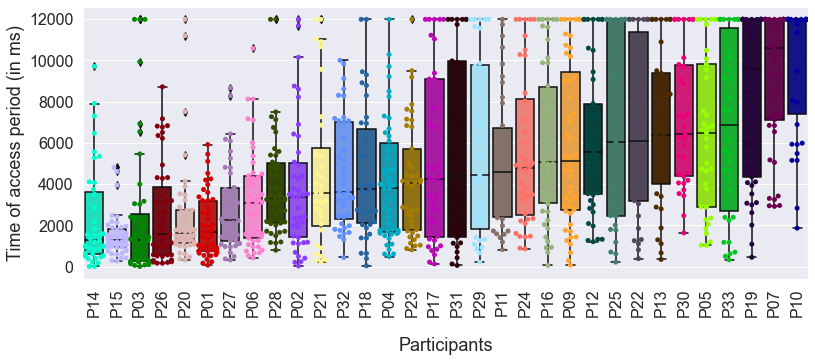

In [4]:
#############
# TPS_ACCES #
#############

# supplementary
# additional figure to show the distribution of the access phase duration accross trials for all the participants together
med = df['tps_acces'].median()
moy = df['tps_acces'].mean()
std = df['tps_acces'].std()
q1=np.quantile(df['tps_acces'],0.25)
q3=np.quantile(df['tps_acces'],0.75)
sns.set(rc={'figure.figsize':(13,5)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set_theme(style="white")
sns.histplot(df['tps_acces'],bins=30,ax=ax_hist, color = 'darkgray')
plt.axvline(med, color='coral', linestyle='--')
plt.axvline(q1, color='coral', linestyle=':')
plt.axvline(q3, color='coral', linestyle=':')
plt.xlabel('Duration of access period (ms)',labelpad= 10.0, fontsize = 16)
plt.ylabel('Number of trials',labelpad= 10.0, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks([0, 50, 100, 150], fontsize = 14)
sns.set_theme(style="white")
sns.boxplot(df['tps_acces'],ax=ax_box, color = 'darkgray')
ax_box.set(xlabel='')
plt.suptitle("Duration of access period (ms)",fontweight='bold',color='#dc8a0d')
plt.savefig(wd_output+"\\supplementary\\distributions_tps_acces.png",bbox_inches = "tight")
plt.show()


#supplementary
# show the individual distributions of access phase duration through the participants
list_tps_access_median = []
suj_tps_access = []
for i in sujets :
    df_sujet=df.loc[df['Sujet']==i]
    list_tps_access_median.append(df_sujet['tps_acces'].median())
    suj_tps_access.append(i)
    
list_tps_access_median = np.array(list_tps_access_median)
suj_tps_access = np.array(suj_tps_access)
inds = list_tps_access_median.argsort()
sortedsujets = suj_tps_access[inds]  
list_tps_access_median.sort()

sortedcolors2 = palette[inds]  
sns.set(rc={'figure.figsize':(13,5)})
sns.boxplot(x='Sujet',y='tps_acces',data=df, order=sortedsujets, palette = sortedcolors2)
sns.swarmplot(x='Sujet',y='tps_acces',data=df, order=sortedsujets, palette = sortedcolors2)
plt.xticks(ticks = list(range(0,32)), labels = sortedsujets, rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Participants", fontsize = 18, labelpad = 20)
plt.ylabel("Time of access period (in ms)", fontsize = 18)
plt.savefig(wd_output+"\\supplementary\\individuals_tps_acces.png",bbox_inches = "tight")
plt.show()  

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


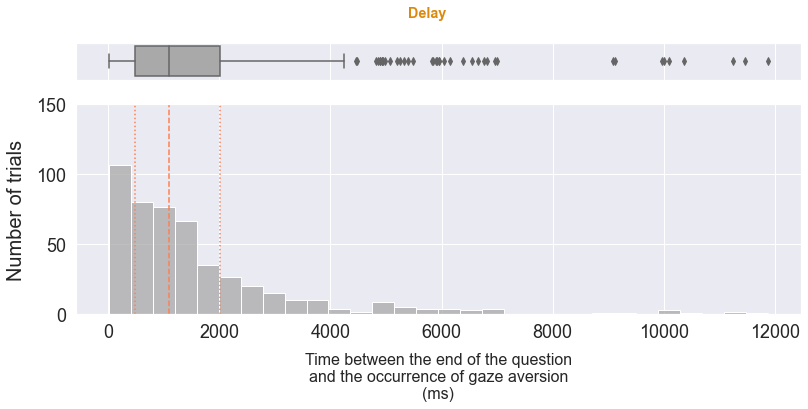

32


C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_

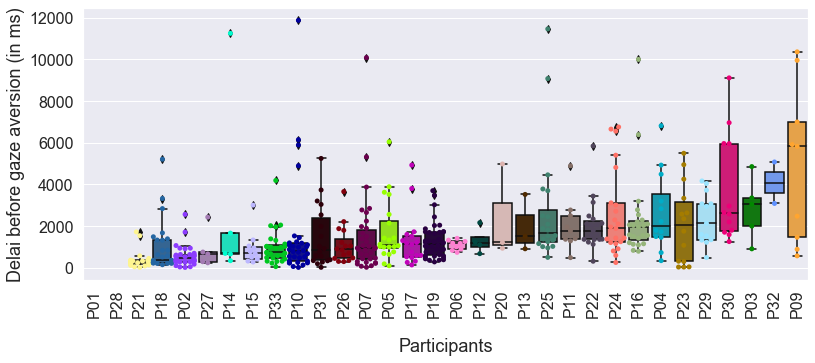

In [5]:
#########
# DELAI #
#########

# figure from the paper
# figure showing the distribution of the delai accross all trials (delai = time after the end of the question before the start of gaze aversion)
med = df_acc['delai'].median()
moy = df_acc['delai'].mean()
std = df_acc['delai'].std()
q1=np.quantile(df_acc['delai'],0.25)
q3=np.quantile(df_acc['delai'],0.75)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.set_theme(style="white")
sns.histplot(df_acc['delai'],bins=30,ax=ax_hist, color = 'darkgray')

plt.axvline(med, color='coral', linestyle='--')
plt.axvline(q1, color='coral', linestyle=':')
plt.axvline(q3, color='coral', linestyle=':')
plt.xlabel('Time between the end of the question\nand the occurrence of gaze aversion\n(ms)',labelpad= 10.0, fontsize = 16)
plt.ylabel('Number of trials',labelpad= 10.0, fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks([0, 50, 100, 150], fontsize = 18)
sns.boxplot(df_acc['delai'],ax=ax_box, color = 'darkgray')
ax_box.set(xlabel='')

plt.suptitle("Delay",fontweight='bold',color='#dc8a0d')
output=wd_output+'Access_'+'Delay.png'
plt.savefig(output,bbox_inches = "tight")
plt.show()

# supplementary
# show the individual distributions of delai through the participants
list_delai_median = []
suj_delai = []
for i in sujets :
    df_sujet=df.loc[df['Sujet']==i]
    df_sujet=df_sujet.loc[df_sujet['VD_here']!=0]
    if len(df_sujet) ==0:
        list_delai_median.append(0)
    if len(df_sujet) !=0:
        list_delai_median.append(df_sujet['delai'].median())
    suj_delai.append(i)

print(len(list_delai_median))
list_delai_median = np.array(list_delai_median)
suj_delai = np.array(suj_delai)
inds = list_delai_median.argsort()
sortedsujets = suj_delai[inds]  
anonymised_participants = []

list_delai_median.sort()

sortedcolors2 = palette[inds]  
sns.set(rc={'figure.figsize':(13,5)})
sns.boxplot(x='Sujet',y='delai',data=df[df['VD_here']!=0], order=sortedsujets, palette = sortedcolors2)
sns.swarmplot(x='Sujet',y='delai',data=df[df['VD_here']!=0], order=sortedsujets, palette = sortedcolors2)
plt.xticks(ticks = list(range(0,32)), labels = sortedsujets, rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Participants", fontsize = 18, labelpad = 20)
plt.ylabel("Delai before gaze aversion (in ms)", fontsize = 18)
#plt.suptitle("Temps d'accès par sujet", fontsize = 16)
plt.savefig(wd_output+"\\supplementary\\individuals_delai.png",bbox_inches = "tight")
plt.show()  

C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\1842889884.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_VD_duration_acc_vis'][i] = df['moy_duree_VD'][i] + df['duration_VD_during_elaboration'][i]
C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\1842889884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_VD_duration_acc_vis'][i] = df['moy_duree_VD'][i]
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other

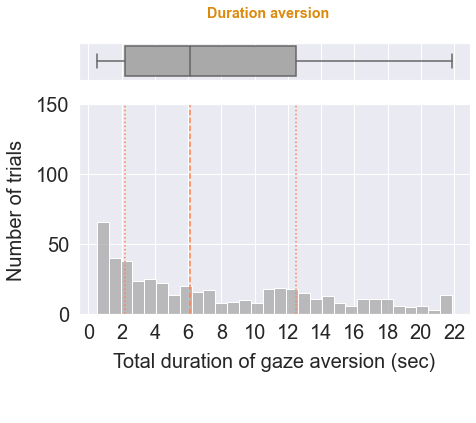

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_a

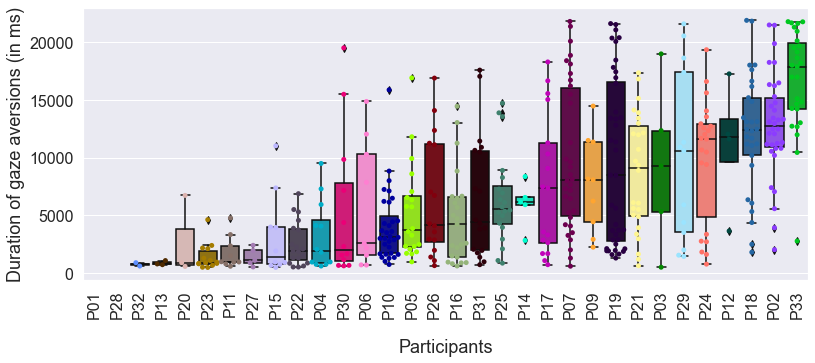

In [6]:
#############################
# DURATION OF GAZE AVERSION #
#############################

# First recalculate total duration of gaze aversion (add duration during access and duration during elaboration for aversion which last accross phases)
df['nb_VD_elaboration'] = df_visu['nb_VD']
df['VD_visu_start_access'] = df_visu['delai']
df['duration_VD_during_elaboration'] = df_visu['duration_VD_in_elaboration_if_started_before ']

df['total_VD_duration_acc_vis'] = ''

for i in range(len(df)):
    if df['VD_visu_start_access'][i] == 'START_during_ACCESS':
        df['total_VD_duration_acc_vis'][i] = df['moy_duree_VD'][i] + df['duration_VD_during_elaboration'][i]
    elif df['VD_visu_start_access'][i] != 'START_during_ACCESS':
        df['total_VD_duration_acc_vis'][i] = df['moy_duree_VD'][i] 
acc_with_VD = df.loc[df['VD_here']!=0]
acc_with_VD

# figure from the paper
# figure showing the distribution of the duration of gaze aversions accross all trials
#################
# DUREE ABSOLUE #
#################
med = acc_with_VD['total_VD_duration_acc_vis'].median()
q1=np.quantile(acc_with_VD['total_VD_duration_acc_vis'],0.25)
q3=np.quantile(acc_with_VD['total_VD_duration_acc_vis'],0.75)
moy = acc_with_VD['total_VD_duration_acc_vis'].mean()
std = acc_with_VD['total_VD_duration_acc_vis'].std()

sns.set(rc={'figure.figsize':(7,5)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set_theme(style="white")
sns.histplot(acc_with_VD['total_VD_duration_acc_vis'],bins=30,ax=ax_hist, color = 'darkgray')

plt.axvline(med, color='coral', linestyle='--')
plt.axvline(q1, color='coral', linestyle=':')
plt.axvline(q3, color='coral', linestyle=':')
sns.boxplot(acc_with_VD['total_VD_duration_acc_vis'],ax=ax_box, color = 'darkgray')
ax_box.set(xlabel='')
plt.xlabel('Total duration of gaze aversion (sec)\n\n',labelpad= 10.0, fontsize = 20)
plt.ylabel('Number of trials',labelpad= 10.0, fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks([0, 50, 100, 150], fontsize = 20)
plt.xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000], ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22'], fontsize = 20)

plt.suptitle("Duration aversion",fontweight='bold',color='#dc8a0d')
output=wd_output+'Access_'+'Duration_aversion.png'
plt.show()

# supplementary
# show the individual distributions of gaze aversion duration through the participants
list_moy_duree_VD_median = []
suj_moy_duree_VD = []
for i in sujets :
    df_sujet=df.loc[df['Sujet']==i]
    df_sujet=df_sujet.loc[df_sujet['VD_here']!=0]
    if len(df_sujet) ==0:
        list_moy_duree_VD_median.append(0)
    if len(df_sujet) !=0:
        list_moy_duree_VD_median.append(df_sujet['total_VD_duration_acc_vis'].median())
    
    suj_moy_duree_VD.append(i)
    
list_moy_duree_VD_median = np.array(list_moy_duree_VD_median)
suj_moy_duree_VD = np.array(suj_moy_duree_VD)
inds = list_moy_duree_VD_median.argsort()
sortedsujets = suj_moy_duree_VD[inds]  

list_moy_duree_VD_median.sort()

sortedcolors2 = palette[inds]  
sns.set(rc={'figure.figsize':(13,5)})
sns.boxplot(x='Sujet',y='total_VD_duration_acc_vis',data=df[df['VD_here']!=0], order=sortedsujets, palette = sortedcolors2)
sns.swarmplot(x='Sujet',y='total_VD_duration_acc_vis',data=df[df['VD_here']!=0], order=sortedsujets, palette = sortedcolors2)
plt.xticks(ticks = list(range(0,32)), labels = sortedsujets, rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Participants", fontsize = 18, labelpad = 20)
plt.ylabel("Duration of gaze aversions (in ms)", fontsize = 18)
plt.savefig(wd_output+"\\supplementary\\individuals_duration_aversion.png",bbox_inches = "tight")
plt.show() 

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


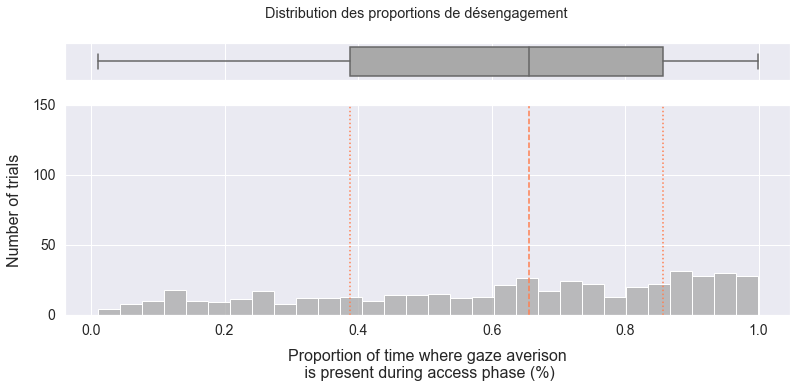

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhavin\Anaconda3\envs\gaze_ast

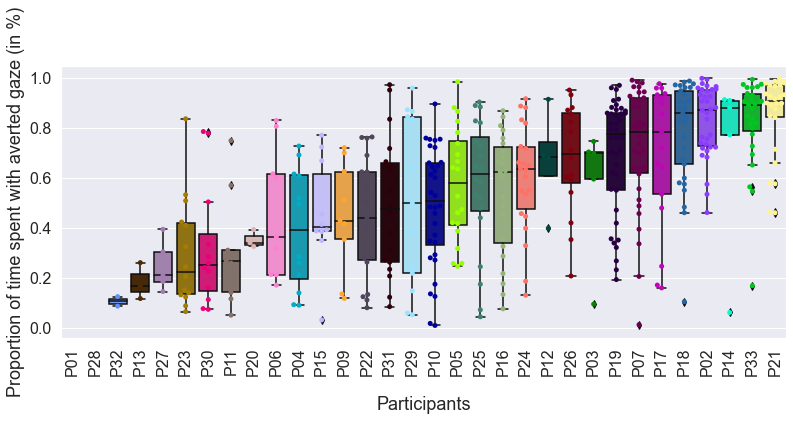

In [7]:
###########################################
# PROPORTION OF ACCESS WITH GAZE AVERSION #
###########################################

# supplementary
# figure showing the distribution of the proportion of time where the gaze is averted for all trials
med = df_acc['ratio'].median()
q1=np.quantile(df_acc['ratio'],0.25)
q3=np.quantile(df_acc['ratio'],0.75)
moy = df_acc['ratio'].mean()
std = df_acc['ratio'].std()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.set_theme(style="white")
sns.histplot(df_acc['ratio'],bins=30,ax=ax_hist, color = 'darkgray')

plt.axvline(med, color='coral', linestyle='--')
plt.axvline(q1, color='coral', linestyle=':')
plt.axvline(q3, color='coral', linestyle=':')
sns.boxplot(df_acc['ratio'],ax=ax_box, color = 'darkgray')
ax_box.set(xlabel='')
plt.xlabel('Proportion of time where gaze averison\n is present during access phase (%)',labelpad= 10.0, fontsize = 16)
plt.ylabel('Number of trials',labelpad= 10.0, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks([0, 50, 100, 150], fontsize = 14)
plt.suptitle("Distribution des proportions de désengagement")
output=wd_output+"\\supplementary\\Access_Ratio.png"
plt.savefig(output,bbox_inches = "tight")
plt.show()

# supplementary
# show the individual distributions of proportion of access time with gaze aversion through the participants
list_ratio_median = []
suj_ratio = []
for i in sujets :
    df_sujet=df.loc[df['Sujet']==i]
    df_sujet=df_sujet.loc[df_sujet['VD_here']!=0]
    if len(df_sujet) ==0:
        list_ratio_median.append(0)
    if len(df_sujet) !=0:
        list_ratio_median.append(df_sujet['ratio'].median())
    
    suj_ratio.append(i)
    
list_ratio_median = np.array(list_ratio_median)
suj_ratio = np.array(suj_ratio)
inds = list_ratio_median.argsort()
sortedsujets = suj_ratio[inds]  

list_ratio_median.sort()

sortedcolors2 = palette[inds]  
sns.set(rc={'figure.figsize':(13,5)})
sns.boxplot(x='Sujet',y='ratio',data=df[df['VD_here']!=0], order=sortedsujets, palette = sortedcolors2)
sns.swarmplot(x='Sujet',y='ratio',data=df[df['VD_here']!=0], order=sortedsujets, palette = sortedcolors2)
plt.xticks(ticks = list(range(0,32)), labels = sortedsujets, rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Participants", fontsize = 18, labelpad = 20)
plt.ylabel("Proportion of time spent with averted gaze (in %)", fontsize = 18)
#plt.suptitle("Temps d'accès par sujet", fontsize = 16)
plt.savefig(wd_output+"\\supplementary\\individuals_proportion_access_with_aversion.png",bbox_inches = "tight")
plt.show() 

## Gaze aversion in Access phase

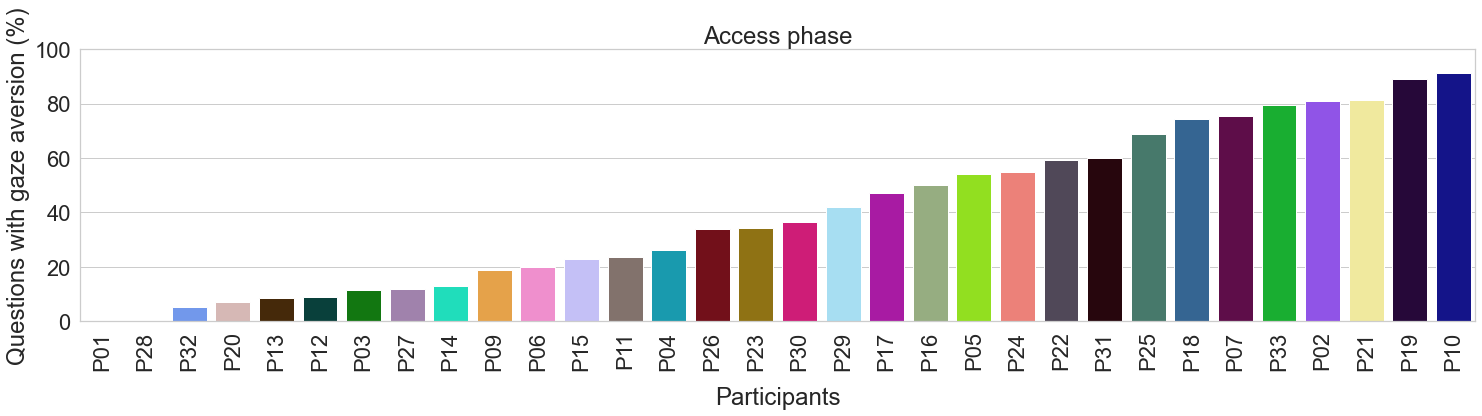

Hartigan's Dip test:  p-value =  0.858853540578707


In [8]:
########################################################################################################
# Figure showing the proportion of question with gaze aversion per participant during the access phase #
########################################################################################################

# figure from the paper
perc_VD_sub = []
list_sub = []
for ind, sub in enumerate(sujets):
    df_sub = df[df['Sujet'] == sub]
    df_sub_VD = df_sub[df_sub['VD_here'] > 0]
    
    nb_essais_sujets_with_VD = len(df_sub_VD)
    nb_essais_sujets = len(df_sub)
    
    perc_VD_sub.append(nb_essais_sujets_with_VD/nb_essais_sujets*100)
    list_sub.append(sub)

perc_aversion_subj_access = pd.DataFrame({'sujet': list_sub, 'perc_VD':perc_VD_sub})
perc_aversion_subj_access.to_csv(files_for_stat + 'perc_aversion_subj_access.csv')

perc_VD_sub = np.array(perc_VD_sub)
list_sub = np.array(list_sub)
inds = perc_VD_sub.argsort()

sorted_list_sub = list_sub[inds]  

perc_VD_sub.sort()
    
list_color_hist = []

for i, s in enumerate(sorted_list_sub): # because participant 8 is discarded for visual trouble during the experiment
    s_numerique = int(s[1:])     
    if s_numerique < 8:
        list_color_hist.append(palette[s_numerique-1])
    if s_numerique > 8:
        list_color_hist.append(palette[s_numerique-2])
        
sns.set(rc={'figure.figsize':(25,5)})
fig = plt.figure(None)

sns.set_style("whitegrid")
sns.barplot(x=sorted_list_sub,y=perc_VD_sub, palette = list_color_hist)
plt.ylim(0,100)
plt.title('Access phase', fontsize = 24)
    
plt.xticks(rotation=90, fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel("Participants", fontsize = 24, labelpad = 16)
plt.ylabel("Questions with gaze aversion (%)", fontsize = 24)
   
plt.savefig(wd_output+ 'hist_perc_GAZE_AVERSION_sujet_ACCESS.png', transparent=True,bbox_inches = "tight")
plt.show()

# Hartigan's dip test to test the unimodality/bimodality of the distribution
dip, pval = diptest.diptest(perc_VD_sub)
print("Hartigan's Dip test: ", "p-value = ", pval)

## Access phase: Relations between gaze aversion and cognitive variables (cognitive effort & vividness)

In [9]:
# the 2 variables self-evaluation on a 3-levels Likert scale: retrieval effort & vividness of memories
# L-ticks contains the labels for the 3 propositions between which participants chose an answer dor every memory question
L_var=['effort ','clarte']
L_label=['Retrieval effort','Vividness']
L_ticks=[['spontaneous','mild','high'], \
         ['not at all','blurry',"clearly"]]

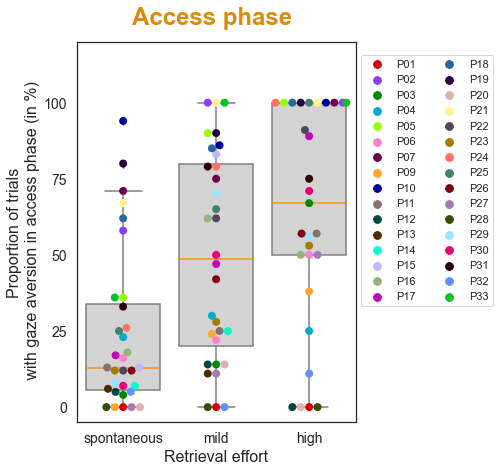

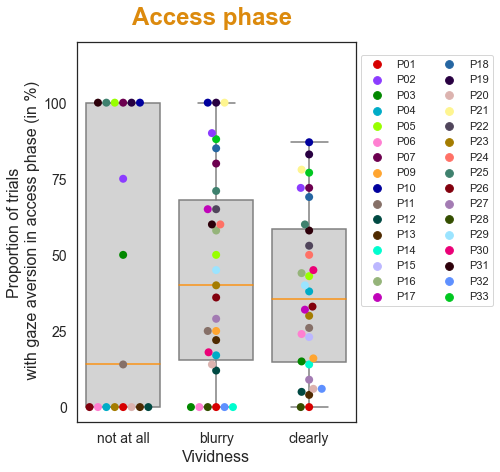

In [10]:
###############################################################################################################
# BOXPLOT of the number of question with gaze aversion depending on the level of effort or vividness reported #
###############################################################################################################

# boxplot from the paper (with supplementary swarmplot to visualize individual performance)
L_title="Access phase"
for var_cat in range(len(L_var)) :
    var=L_var[var_cat]
    group=df.groupby(['Sujet',var])
    proportion=(group['VD_here'].value_counts(normalize=True).round(2))*100
    data=[]
    for i in sujets:
        anonym_code = i
        prop_sujet=proportion[i]
        for n in range(len(L_ticks[var_cat])):
            n=n+1
            if n in prop_sujet.index :                 
                percent=prop_sujet[n]
                pp=percent.to_dict()
                if 1 in pp:
                    prop=pp[1]
                elif 1 not in pp:
                    prop=100-pp[0]                     
                data.append([anonym_code,n,prop])
    ddf=pd.DataFrame(data,columns=['sujet',var,'prop_VD'])
    ddf.to_csv(files_for_stat + 'Access_prop_VD_' + var + '.csv')
    
    titre='VD_here en fonction de '+var
    
    plt.figure(figsize=(5, 7))
    sns.set_theme(style="white")
    sns.boxplot(x=var,y='prop_VD',data=ddf,color='lightgrey',medianprops=dict(color="darkorange", alpha=0.9))
    sns.swarmplot(x=var, y='prop_VD', data=ddf, size=8,hue='sujet',palette=palette)
    plt.xticks(range(len(L_ticks[var_cat])), L_ticks[var_cat], fontsize = 14)
    plt.xlabel(L_label[var_cat],size=16)
    plt.ylim(-5,120)
    plt.yticks([0, 25, 50, 75, 100], fontsize=14)

    plt.ylabel(ylabel="Proportion of trials\n with gaze aversion in access phase (in %)",size=16)
    plt.legend(bbox_to_anchor = (1, 0.98),loc = 'upper left', ncol = 2)
    plt.suptitle(L_title,fontweight='bold',color='#dc8a0d',y=0.95, fontsize = 24 )
    output=wd_output+'Boxplot_Access_'+'Aversion_'+var+'.png'
    plt.savefig(output,bbox_inches = "tight")
    plt.show()
    
    
    

# Elaboration phase

In [11]:
# Calculate the number of gaze aversion of the elaboration phase which had started during the access phase

nb_start_access = 0
for i in range(len(df_vis['Sujet'])):
    if df_vis['delai'][i] == 'START_during_ACCESS':
        nb_start_access = nb_start_access +1
        df_vis['delai'][i] = -df_vis['time_before_visu_VD'][i]
    df_vis['delai'][i] = float(df_vis['delai'][i])
    df_vis['moy_duree_VD'][i] = float(df_vis['moy_duree_VD'][i])
    df_vis['ratio'][i] = float(df_vis['ratio'][i])

print("nb of VD during the elaboration, which started during the access =", nb_start_access)

C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\1706394625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['delai'][i] = -df_vis['time_before_visu_VD'][i]
C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\1706394625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['delai'][i] = float(df_vis['delai'][i])
C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\1706394625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


nb of VD during the elaboration, which started during the access = 316


## Gaze aversion in Elaboration phase

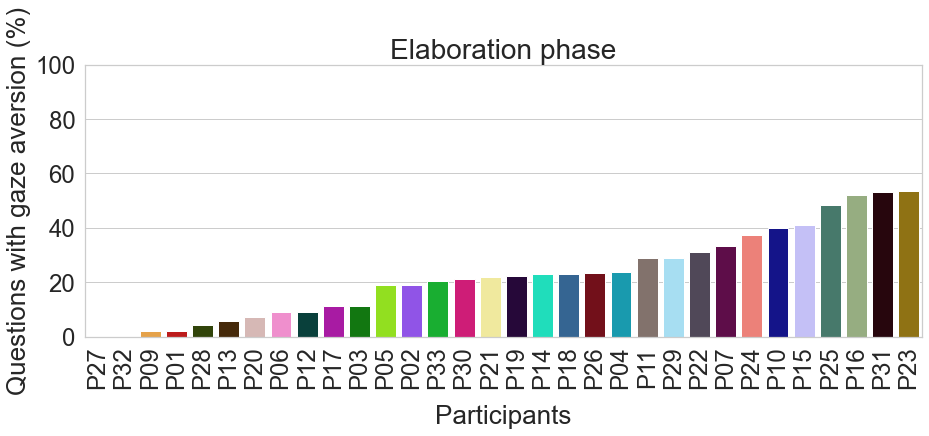

Hartigan's Dip test:  D = 0.06863839285714286 p-value =  0.2644293444474526


In [12]:
#############################################################################################################
# Figure showing the proportion of question with gaze aversion per participant during the elaboration phase #
#############################################################################################################

# figure from the paper
perc_VD_sub = []
list_sub = []
for ind, sub in enumerate(sujets):
    df_sub = df_vis[df_vis['Sujet'] == sub]
    df_sub_VD = df_sub[df_sub['VD_here'] > 0]
    df_sub_VD = df_sub_VD[df_sub_VD['delai'] > 0] # take only gaze aversion which start during elaboration
    
    nb_essais_sujets_with_VD = len(df_sub_VD)
    nb_essais_sujets = len(df_sub)
    
    perc_VD_sub.append(nb_essais_sujets_with_VD/nb_essais_sujets*100)
    list_sub.append(sub)
    
perc_aversion_subj_elaboration = pd.DataFrame({'sujet': list_sub, 'perc_VD':perc_VD_sub})
perc_aversion_subj_elaboration.to_csv(files_for_stat + 'perc_aversion_subj_elaboration.csv')

perc_VD_sub = np.array(perc_VD_sub)
list_sub = np.array(list_sub)
inds = perc_VD_sub.argsort()

sorted_list_sub = list_sub[inds]  

perc_VD_sub.sort()
    
list_color_hist = []

for i, s in enumerate(sorted_list_sub):
    s_numerique = int(s[1:])
        
    if s_numerique < 8:
        list_color_hist.append(palette[s_numerique-1])
    if s_numerique > 8:
        list_color_hist.append(palette[s_numerique-2])

sns.set(rc={'figure.figsize':(15,5)})
fig = plt.figure(None)
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.barplot(x=sorted_list_sub,y=perc_VD_sub, palette = list_color_hist)
plt.ylim(0,100)
plt.title('Elaboration phase', fontsize = 28)
    
    
plt.xticks(rotation=90, fontsize = 24)
plt.yticks(fontsize = 24)
plt.xlabel("Participants", fontsize = 26, labelpad = 16)
plt.ylabel("Questions with gaze aversion (%)", fontsize = 26)
    
plt.savefig(wd_output+ 'hist_perc_VD_sujet_ELABORATION.png', transparent=True,bbox_inches = "tight")
plt.show()

# Hartigan's dip test to test the unimodality/bimodality of the distribution
dip, pval = diptest.diptest(perc_VD_sub)
print("Hartigan's Dip test: ", "D =", dip, "p-value = ", pval)

## Elaboration phase: Relations between gaze aversion and cognitive variables (cognitive effort & vividness)

effort 


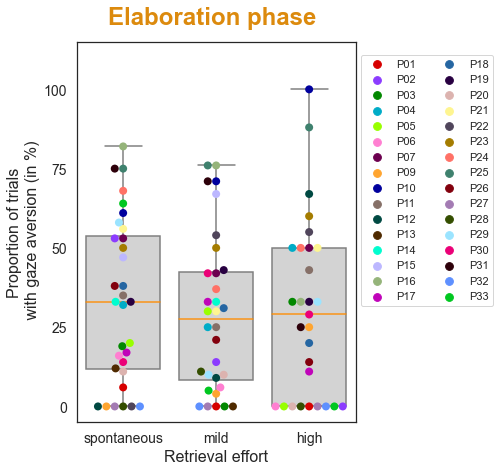

clarte


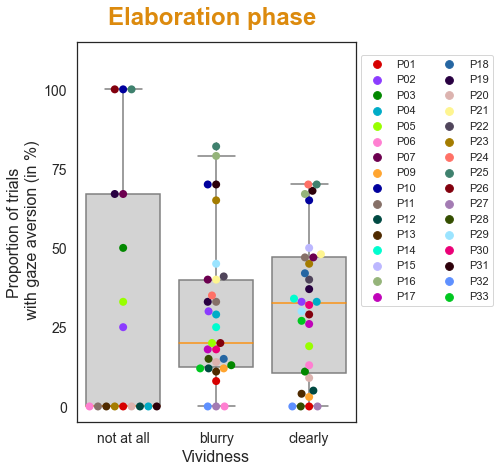

In [13]:
###########
# VD_HERE #
###########

# boxplot from the paper (with supplementary swarmplot to visualize individual performance)
L_title="Elaboration phase"
for var_cat in range(len(L_var)) :
    var=L_var[var_cat]
    print(var)
    group=df_visu.groupby(['Sujet',var])
    proportion=(group['VD_here'].value_counts(normalize=True).round(2))*100
    print(group)
    data=[]
    for i in sujets:   #parcours les sujets
        prop_sujet=proportion[i]
        for n in range(len(L_ticks[var_cat])):
            n=n+1
            if n in prop_sujet.index :   #s'assure qu'il y a la catégo demandée                  
                percent=prop_sujet[n]
                pp=percent.to_dict()
                if 1 in pp:
                    prop=pp[1]
                elif 1 not in pp:
                    prop=100-pp[0]                     
                data.append([i,n,prop])
    ddf=pd.DataFrame(data,columns=['sujet',var,'prop_VD'])
    ddf.to_csv(files_for_stat + 'Elaboration_prop_VD_' + var + '.csv')
    
            
    titre='VD_here en fonction de '+var
    
    plt.figure(figsize=(5, 7))
    sns.set_theme(style="white")
    sns.boxplot(x=var,y='prop_VD',data=ddf,color='lightgrey',medianprops=dict(color="darkorange", alpha=0.9))
    sns.swarmplot(x=var, y='prop_VD', data=ddf, size=8,hue='sujet',palette=palette)
    plt.xticks(range(len(L_ticks[var_cat])), L_ticks[var_cat],fontsize=14)
    plt.xlabel(L_label[var_cat],fontsize=16)
    plt.yticks([0, 25, 50, 75, 100], fontsize=14)
    plt.ylim(-5,115)
    plt.ylabel(ylabel="Proportion of trials\n with gaze aversion (in %)",size=16)
    plt.legend(bbox_to_anchor = (1, 0.98),loc = 'upper left', ncol = 2)
    plt.suptitle(L_title,fontweight='bold',color='#dc8a0d',y=0.95, fontsize = 24 )
    output=wd_output+'Boxplot_Elaboration_'+'Aversion_'+var+'.png'
    plt.savefig(output,bbox_inches = "tight")
    plt.show()
    
        
   

# Orientation of gaze aversions 

### Code to visualize last gaze positions on the screen before gaze aversion

C:\Users\bhavin\Anaconda3\envs\gaze_astom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


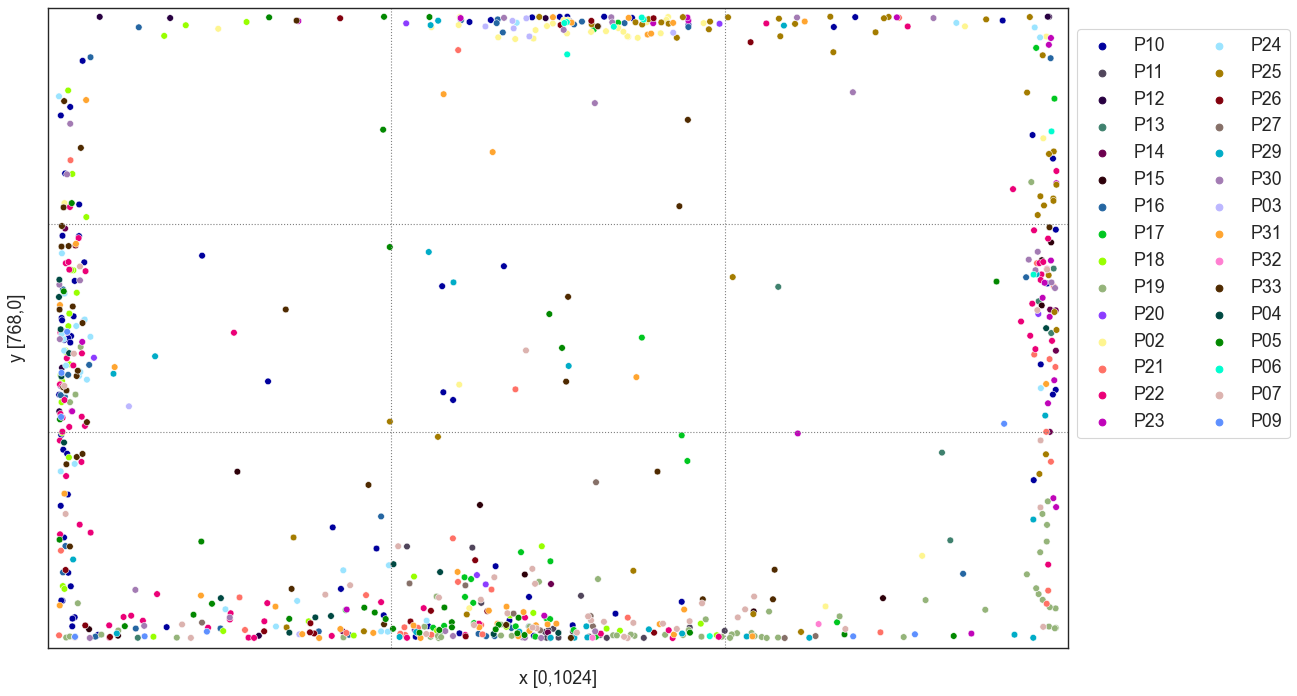

In [14]:
###################################################################################
# Visualize position of last gaze position on the screen before gaze aversion     #
###################################################################################
# 1 dot = 1 gaze aversion
# 1 color = 1 participant
# the line divide the screen in the 8 sections used to define the orientation of aversions
# supplementary
palette_ordered = []
for suj in df_or['sujet'].value_counts().index.tolist():
    if int(suj[1:]) < 8:
        palette_ordered.append(palette[int(suj[1:])-1])
    elif int(suj[1:]) > 8:
        palette_ordered.append(palette[int(suj[1:])-2])
    
fig=plt.figure(figsize=(15,20),dpi=80)
ax = fig.add_axes([0.07,0.38,0.85,0.4])
ax.set_yticks([])
ax.set_xticks([])
plt.xlabel('x [0,1024]', fontsize = 16, labelpad=20)
plt.ylabel('y [768,0]', fontsize = 16, labelpad=20)
plt.xlim(-10,1034)
plt.ylim(-778,10)
sns.scatterplot(df_or['coord_x'],-1*df_or['coord_y'],hue="sujet", palette=palette_ordered,data=df_or)
plt.axvline(341.33, color='grey', linestyle=':',linewidth=1)
plt.axvline(682.66, color='grey', linestyle=':',linewidth=1)
plt.axhline(-256, color='grey', linestyle=':',linewidth=1)
plt.axhline(-512, color='grey', linestyle=':',linewidth=1)
plt.legend(bbox_to_anchor = (1, 0.98),loc = 'upper left', ncol=2, fontsize = 16)
plt.savefig(wd_output+'\\supplementary\\orientation_by_sujet.png',bbox_inches='tight')
plt.show()

### Code to calculate the percentage of gaze aversions in each orientation (all participants together)

In [15]:
# Creation of a dataframe result containing the percentage of gaze aversions in each direction for all participants
df_or_all_down = df_or[df_or['corrected_orientation_video'] == 'down']
df_or_all_up = df_or[df_or['corrected_orientation_video'] == 'up']
df_or_all_downleft = df_or[df_or['corrected_orientation_video'] == 'downleft']
df_or_all_downright = df_or[df_or['corrected_orientation_video'] == 'downright']
df_or_all_left = df_or[df_or['corrected_orientation_video'] == 'left']
df_or_all_right = df_or[df_or['corrected_orientation_video'] == 'right']
df_or_all_upleft = df_or[df_or['corrected_orientation_video'] == 'upleft']
df_or_all_upright = df_or[df_or['corrected_orientation_video'] == 'upright']

list_orientations = ['upleft','up','upright','left','right','down','downleft','downright']
list_pourcentage_GA_per_orientation = [(len(df_or_all_upleft)/len(df_or)),(len(df_or_all_up)/len(df_or)),(len(df_or_all_upright)/len(df_or)),
                                      (len(df_or_all_left)/len(df_or)),(len(df_or_all_right)/len(df_or)),(len(df_or_all_down)/len(df_or)),
                                      (len(df_or_all_downleft)/len(df_or)),(len(df_or_all_downright)/len(df_or))]

dz = pd.DataFrame({'orientation': list_orientations, 'proportion': list_pourcentage_GA_per_orientation})
result = dz.sort_values(['proportion'])
result = result.reset_index()
del result['index']
result

,orientation,proportion
0,right,0.062267
1,upleft,0.066002
2,upright,0.092154
3,downright,0.100872
4,up,0.125778
5,left,0.128269
6,down,0.199253
7,downleft,0.217933


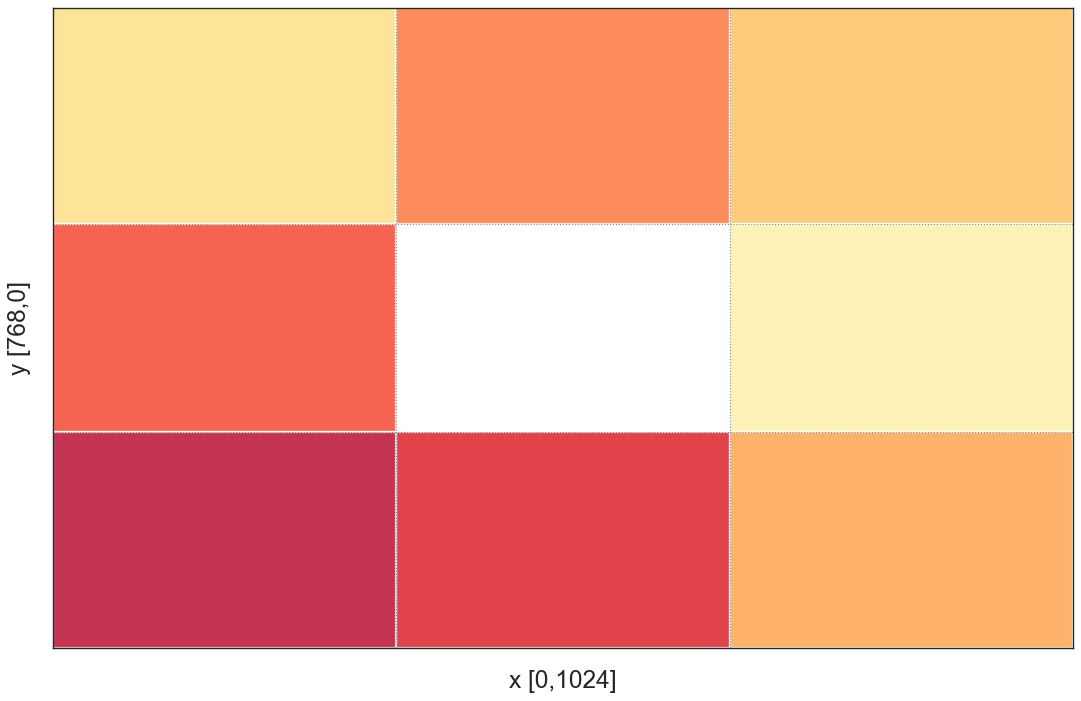

C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\3551719712.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


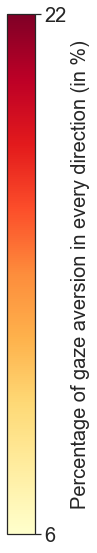

In [16]:
# representation of the screen as a heatmap where the color of each section indicates the proportion of gaze aversion in that direction

palette_heat_map = sns.color_palette('YlOrRd',n_colors=8)

fig=plt.figure(figsize=(15,20),dpi=80)
ax = fig.add_axes([0.07,0.38,0.85,0.4])
ax.set_yticks([])
ax.set_xticks([])
plt.xlabel('x [0,1024]', fontsize = 22, labelpad=20)
plt.ylabel('y [768,0]', fontsize = 22, labelpad=20)
plt.xlim(-10,1034)
plt.ylim(-778,10)
plt.axvline(341.33, color='grey', linestyle=':',linewidth=1)
plt.axvline(682.66, color='grey', linestyle=':',linewidth=1)
plt.axhline(-256, color='grey', linestyle=':',linewidth=1)
plt.axhline(-512, color='grey', linestyle=':',linewidth=1)

rect_upleft=mpatches.Rectangle((-10,-256),351.33,266, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("upleft")])
plt.gca().add_patch(rect_upleft)
rect_up=mpatches.Rectangle((341.33,-256),341.33,266, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("up")])
plt.gca().add_patch(rect_up)
rect_upright=mpatches.Rectangle((682.66,-256),351.33,266, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("upright")])
plt.gca().add_patch(rect_upright)
rect_left=mpatches.Rectangle((-10,-512),351.33,256, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("left")])
plt.gca().add_patch(rect_left)
rect_right=mpatches.Rectangle((682.66,-512),351.33,256, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("right")])
plt.gca().add_patch(rect_right)
rect_down=mpatches.Rectangle((341.33,-778),341.33,266, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("down")])
plt.gca().add_patch(rect_down)
rect_downleft=mpatches.Rectangle((-10,-778),351.33,266, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("downleft")])
plt.gca().add_patch(rect_downleft)
rect_downright=mpatches.Rectangle((682.66,-778),351.33,266, linewidth=2, alpha = 0.8, facecolor=palette_heat_map[list(result['orientation']).index("downright")])
plt.gca().add_patch(rect_downright)

plt.show()

# plot colorbar of the heatmap
fig, ax = plt.subplots(figsize=(0.5, 19))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=0.06, vmax=0.22)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical',
                                ticks=[0.06, 0.22])
cb1.ax.tick_params(labelsize=20)
cb1.ax.set_yticklabels(['6', '22'])
cb1.ax.set_ylabel('Percentage of gaze aversion in every direction (in %)', fontsize = 20)
fig.show()


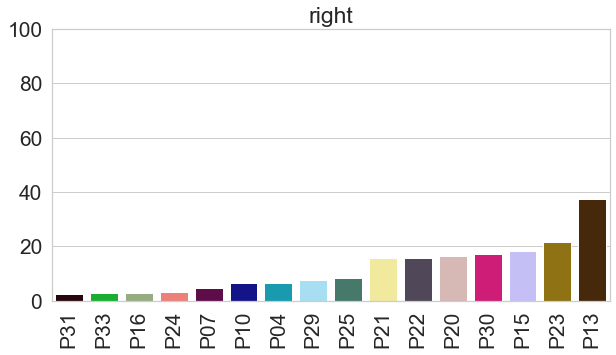

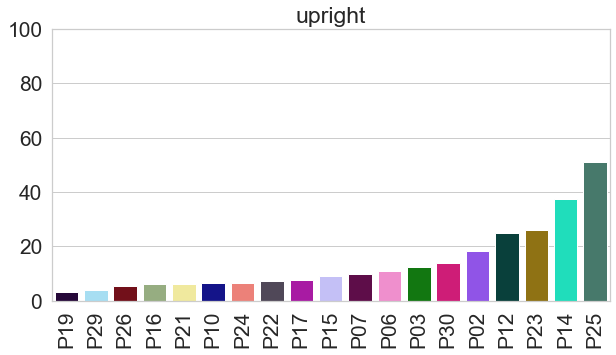

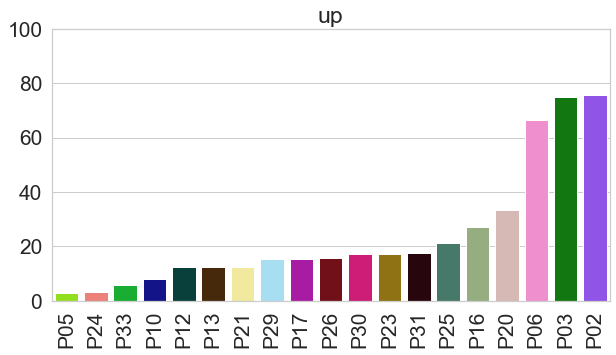

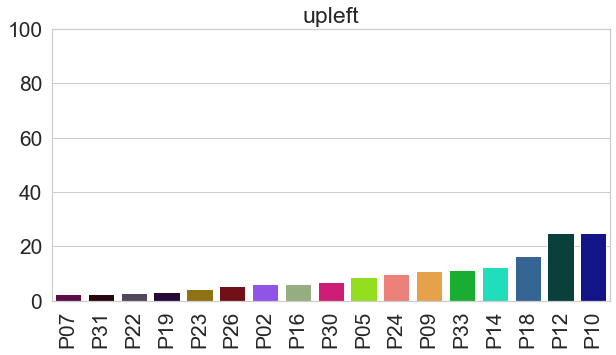

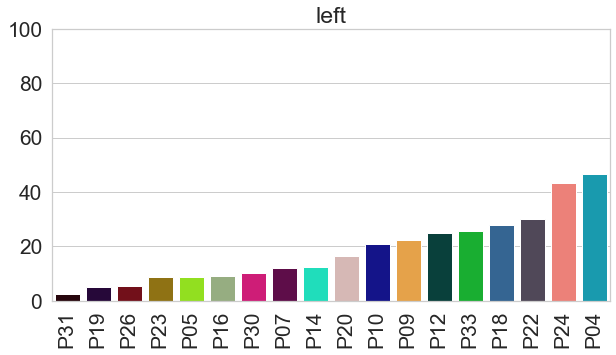

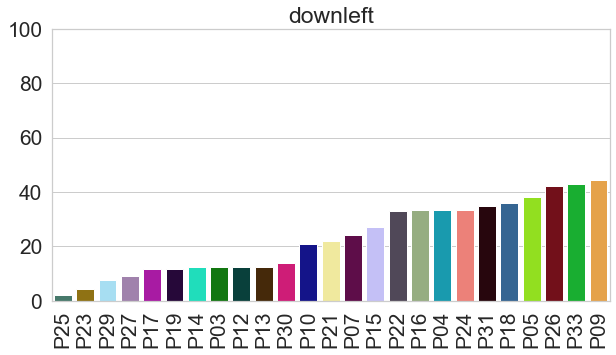

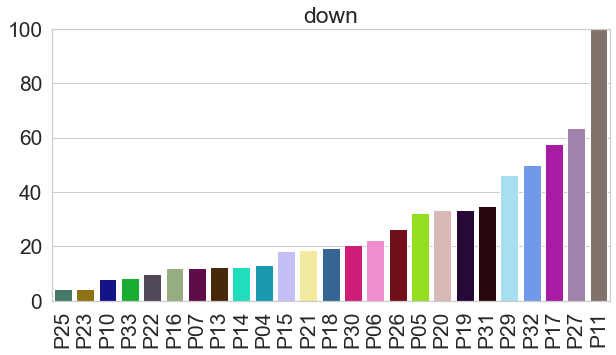

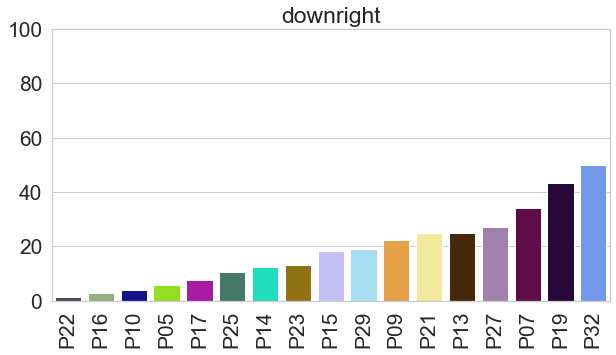

In [17]:
# Reproduce figure from the paper where histogram of individiual behaviour are superposed on the heatmap
# For each gaze aversion direction, plot histograms of the distributions of participants

dir_names = ['right', 'upright', 'up', 'upleft', 'left', 'downleft', 'down', 'downright']

for d in dir_names:
    
    df_or_dir = df_or[df_or['corrected_orientation_video'] == d]
    suj_with_this_dir = []
    nb_suj_in_this_dir = []
    
    for ind, sub in enumerate(sujets):
        df_or_sujet = df_or[df_or['sujet'] == sub]
        if sub in list(df_or_dir['sujet']):
            df_or_sub = df_or_dir[df_or_dir['sujet'] == sub]
            nb_essais_sujets = len(df_or_sub)
            
            suj_with_this_dir.append(sub)
            nb_suj_in_this_dir.append(nb_essais_sujets/len(df_or_sujet)*100)

    nb_suj_in_this_dir = np.array(nb_suj_in_this_dir)
    suj_with_this_dir = np.array(suj_with_this_dir)
    inds = nb_suj_in_this_dir.argsort()
    sortedsujets_per_dir = suj_with_this_dir[inds]  
    
    nb_suj_in_this_dir.sort()
    
    list_color_hist = []

    for i, s in enumerate(sortedsujets_per_dir):
        s_numerique = int(s[1:])
        
        if s_numerique < 8:
            list_color_hist.append(palette[s_numerique-1])
        if s_numerique > 8:
            list_color_hist.append(palette[s_numerique-2])
    
    sns.set(rc={'figure.figsize':(10,5)})
    fig = plt.figure(None)
    
    sns.set_style("whitegrid")
    sns.barplot(x=sortedsujets_per_dir,y=nb_suj_in_this_dir, palette = list_color_hist)
    plt.ylim(0,100)
    plt.title(d, fontsize = 23)
    
    plt.xticks(rotation=90, fontsize = 21)
    plt.yticks(fontsize = 21)
    
    plt.savefig(wd_output+ 'hist_perc_direction_' + d + '.png', transparent=True,bbox_inches = "tight")
    plt.show()

C:\Users\bhavin\AppData\Local\Temp\ipykernel_1628\1356463685.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dir_labels, minor=False, fontsize = 20, rotation=40)


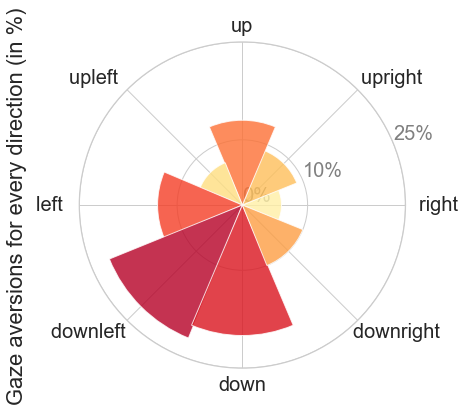

In [18]:
# reproduce figure from the paper
# plot the polar plot with the percentage of gaze aversion in each of the 8 directions

figure = plt.figure(figsize=(6,6))

ax = figure.add_subplot(projection='polar')
ax.set_rorigin(0)

x_val = [0, 45, 90, 135, 180, 225, 270, 315]
a = 0.8
nb_essais_total = len(df_or)

downright = result[result['orientation'] == 'downright']['proportion'].reset_index()
right = result[result['orientation'] == 'right']['proportion'].reset_index()
upright = result[result['orientation'] == 'upright']['proportion'].reset_index()
left = result[result['orientation'] == 'left']['proportion'].reset_index()
downleft = result[result['orientation'] == 'downleft']['proportion'].reset_index()
upleft = result[result['orientation'] == 'upleft']['proportion'].reset_index()
down = result[result['orientation'] == 'down']['proportion'].reset_index()
up = result[result['orientation'] == 'up']['proportion'].reset_index()

ax.bar(np.pi*(x_val[0]/180),round(right['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("right")],alpha=a)
ax.bar(np.pi*(x_val[1]/180),round(upright['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("upright")],alpha=a)
ax.bar(np.pi*(x_val[2]/180),round(up['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("up")],alpha=a)
ax.bar(np.pi*(x_val[3]/180),round(upleft['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("upleft")],alpha=a)
ax.bar(np.pi*(x_val[4]/180),round(left['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("left")],alpha=a)
ax.bar(np.pi*(x_val[5]/180),round(downleft['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("downleft")],alpha=a)
ax.bar(np.pi*(x_val[6]/180),round(down['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("down")],alpha=a)
ax.bar(np.pi*(x_val[7]/180),round(downright['proportion'][0]*100),color=palette_heat_map[list(result['orientation']).index("downright")],alpha=a)

dir_labels = ['      right', '        upright', 'up', 'upleft        ', 'left     ', 'downleft          ', 'down', '          downright']
ax.set_xticklabels(dir_labels, minor=False, fontsize = 20, rotation=40)
ax.set_yticks([0, 10, 25], fontsize = 20)
ax.set_yticklabels(('0%', '10%', '25%'), fontsize = 20, color = 'gray')
plt.ylabel('Gaze aversions for every direction (in %)',fontsize = 22, labelpad = 52)
plt.savefig(wd_output+'radial_hist_orientation_percent.png',bbox_inches='tight')
plt.show()

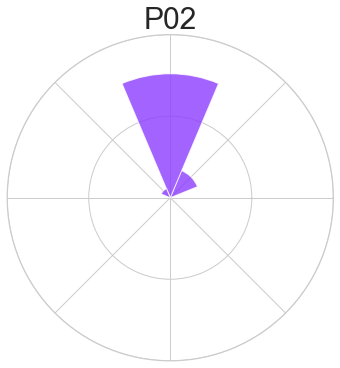

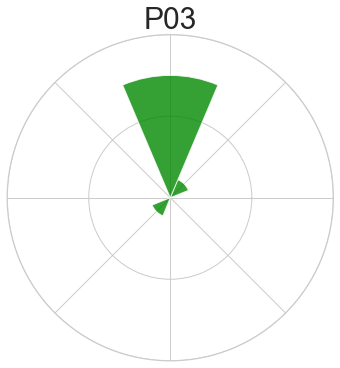

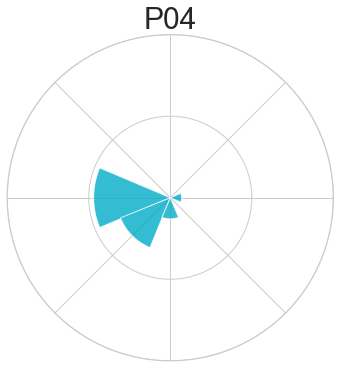

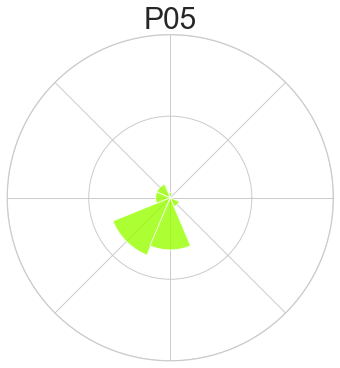

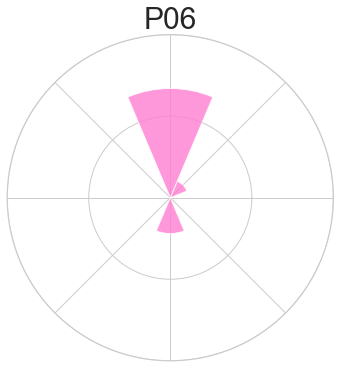

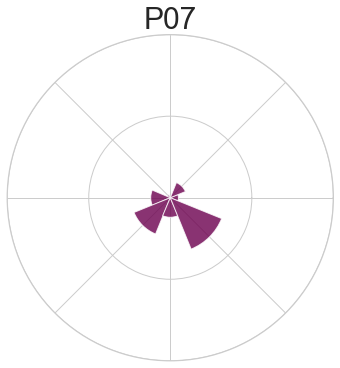

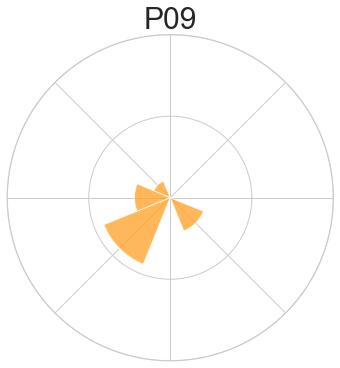

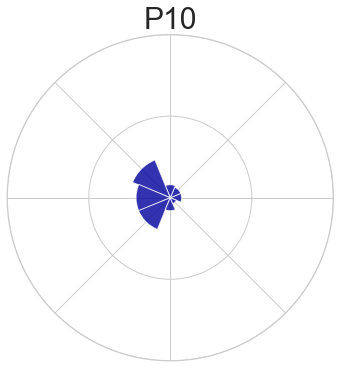

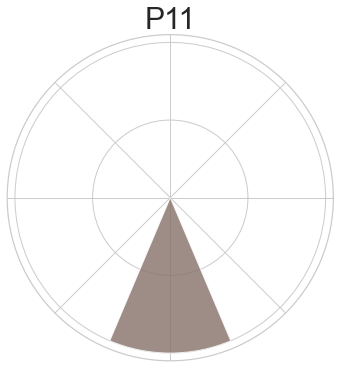

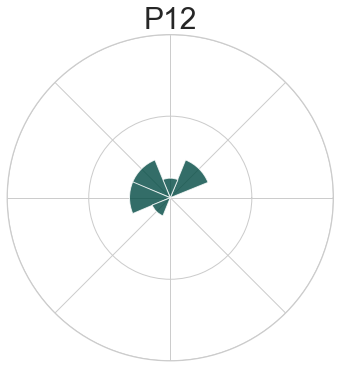

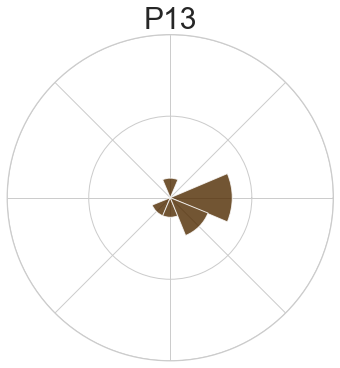

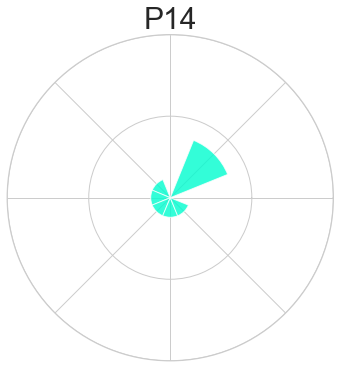

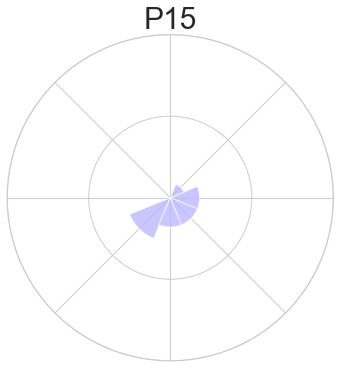

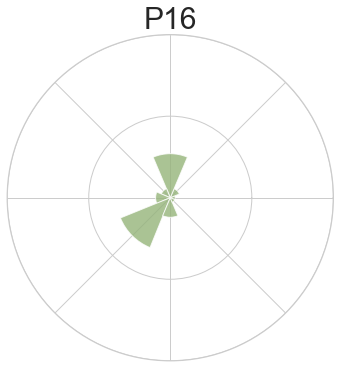

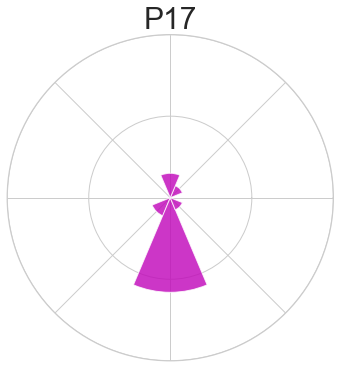

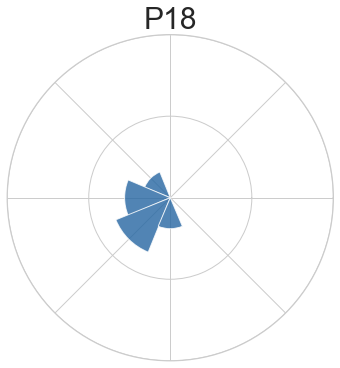

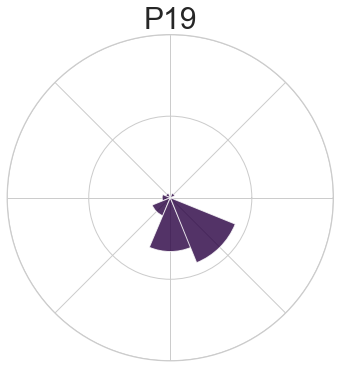

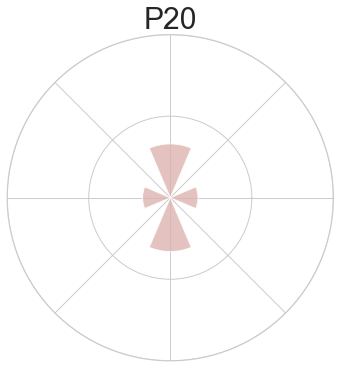

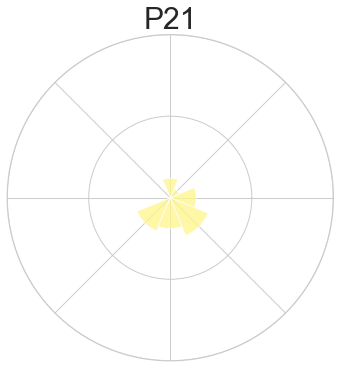

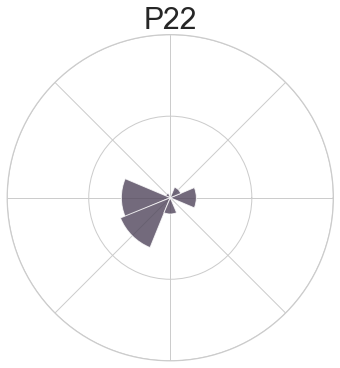

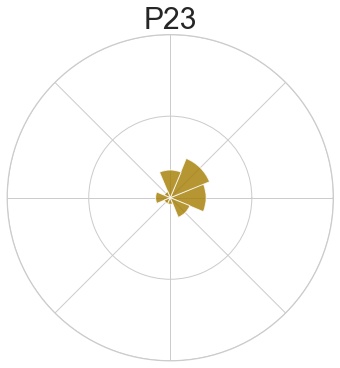

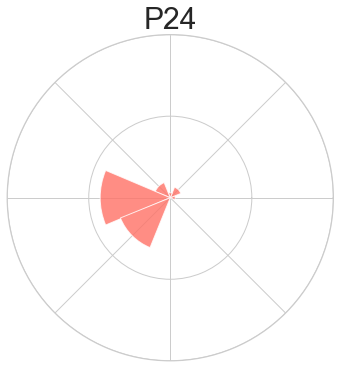

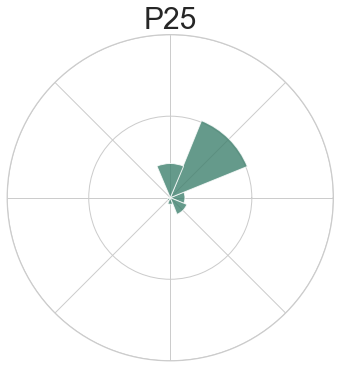

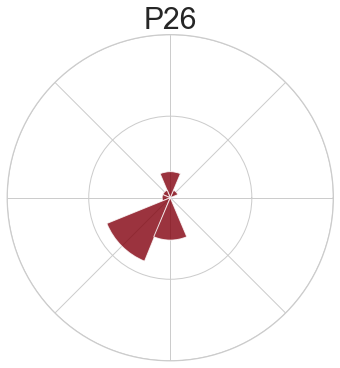

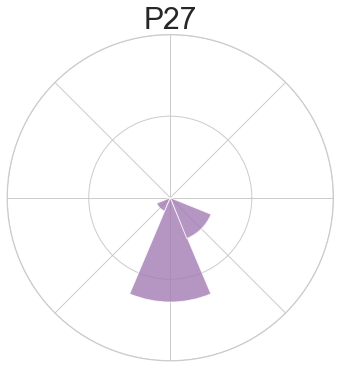

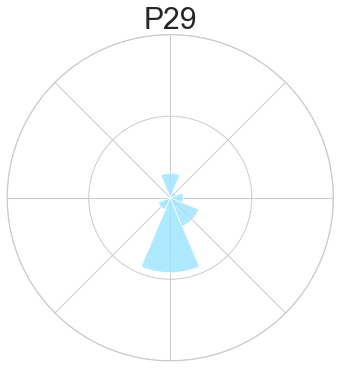

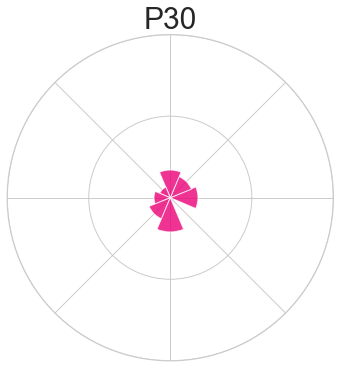

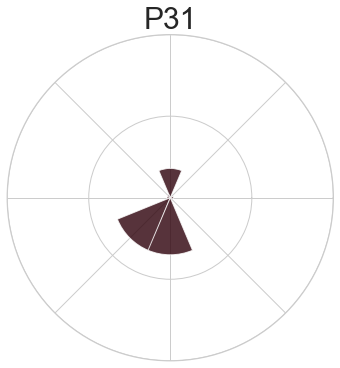

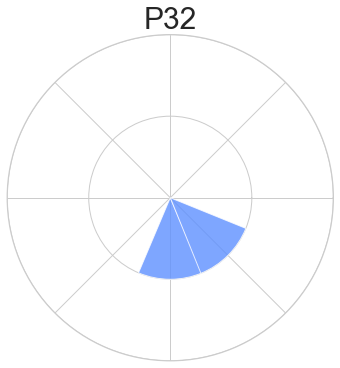

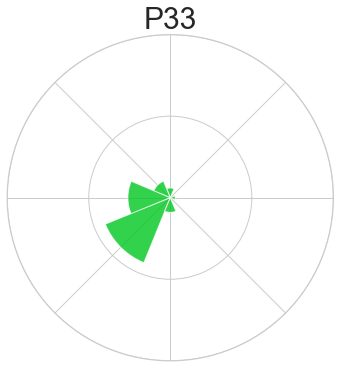

In [19]:
# Individual results (used in the paper for the figure about the clustering based on the preferential direction for gaze aversion)
# Plot a polar histogram of the percentage of aversions in every direction for each participant

for ind, sub in enumerate(sujets):
    if sub in list(df_or['sujet']):
        df_or_sub = df_or[df_or['sujet'] == sub]
        nb_essais_total = len(df_or_sub)
        
        df_or_sub_down = df_or_sub[df_or_sub['corrected_orientation_video'] == 'down']
        df_or_sub_up = df_or_sub[df_or_sub['corrected_orientation_video'] == 'up']
        df_or_sub_downleft = df_or_sub[df_or_sub['corrected_orientation_video'] == 'downleft']
        df_or_sub_downright = df_or_sub[df_or_sub['corrected_orientation_video'] == 'downright']
        df_or_sub_upleft = df_or_sub[df_or_sub['corrected_orientation_video'] == 'upleft']
        df_or_sub_upright = df_or_sub[df_or_sub['corrected_orientation_video'] == 'upright']
        df_or_sub_left = df_or_sub[df_or_sub['corrected_orientation_video'] == 'left']
        df_or_sub_right = df_or_sub[df_or_sub['corrected_orientation_video'] == 'right']     
        
        figure = plt.figure(figsize=(6,6))

        ax = figure.add_subplot(projection='polar')
        ax.set_rorigin(0)

        x_val = [0, 45, 90, 135, 180, 225, 270, 315]
        a = 0.8
        
        ax.bar(np.pi*(x_val[0]/180),round(len(df_or_sub_right)/nb_essais_total*100),color=palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[1]/180),round(len(df_or_sub_upright)/nb_essais_total*100),color=palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[2]/180),round(len(df_or_sub_up)/nb_essais_total*100),color=palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[3]/180),round(len(df_or_sub_upleft)/nb_essais_total*100),color=palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[4]/180),round(len(df_or_sub_left)/nb_essais_total*100),color=palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[5]/180),round(len(df_or_sub_downleft)/nb_essais_total*100),color =palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[6]/180),round(len(df_or_sub_down)/nb_essais_total*100),color=palette[ind],alpha=a)
        ax.bar(np.pi*(x_val[7]/180),round(len(df_or_sub_downright)/nb_essais_total*100),color=palette[ind],alpha=a)
        
        ax.set_xticklabels('')
        ax.set_yticks([0, 50, 100])
        ax.set_yticklabels('')
        plt.title('P'+sub[-2:], fontsize = 30)
        
        plt.savefig(wd_output+'radial_hist_orientation_percent_' + sub +'.png',bbox_inches='tight', transparent=True)
        plt.show()
